# <center> Estimation of Obesity Levels Based on Eating Habits and Physical Condition

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')  # for clean notebook

In [3]:
from google.cloud import bigquery
import pandas as pd

# Create a BigQuery client
client = bigquery.Client()

# Define your full BigQuery table path
# Format: project_id.dataset.table
table_id = 'etl-for-obesity-level-analysis.obesity_dataset.obesity_cleaned'

# Define the SQL query
query = f"""
SELECT *
FROM `{table_id}`
"""

# Run the query and convert to DataFrame
dataset = client.query(query).to_dataframe()

# Preview the data
dataset.head()


gender   age  height     weight  family_history_with_overweight  favc  \
0  Female  21.0    1.62  64.000000                               1     0   
1  Female  21.0    1.52  56.000000                               1     0   
2    Male  23.0    1.80  77.000000                               1     0   
3    Male  27.0    1.80  87.000000                               0     0   
4    Male  22.0    1.78  89.800003                               0     0   

   fcvc  ncp       caec  smoke  ch2o  scc  faf  tue        calc  \
0   2.0  3.0  Sometimes      0   2.0    0  0.0  1.0          no   
1   3.0  3.0  Sometimes      1   3.0    1  3.0  0.0   Sometimes   
2   2.0  3.0  Sometimes      0   2.0    0  2.0  1.0  Frequently   
3   3.0  3.0  Sometimes      0   2.0    0  2.0  0.0  Frequently   
4   2.0  1.0  Sometimes      0   2.0    0  0.0  0.0   Sometimes   

                  mtrans           nobeyesdad        bmi    age_group  \
0  Public_Transportation        Normal_Weight  24.386526        Youth   
1  Public_Transportation        Normal_Weight  24.238228        Youth   
2  Public_Transportation        Normal_Weight  23.765432        Youth   
3                Walking   Overweight_Level_I  26.851852  Young Adult   
4  Public_Transportation  Overweight_Level_II  28.342381        Youth   

   lifestyle_score  
0              5.0  
1              6.0  
2              7.0  
3              6.0  
4              4.0

In [4]:
# Making copy of dataset
df = dataset.copy(deep = True)

In [34]:
df.head()

gender   age  height     weight  family_history_with_overweight  favc  \
0  Female  21.0    1.62  64.000000                               1     0   
1  Female  21.0    1.52  56.000000                               1     0   
2    Male  23.0    1.80  77.000000                               1     0   
3    Male  27.0    1.80  87.000000                               0     0   
4    Male  22.0    1.78  89.800003                               0     0   

   fcvc  ncp       caec  smoke  ch2o  scc  faf  tue        calc  \
0   2.0  3.0  Sometimes      0   2.0    0  0.0  1.0          no   
1   3.0  3.0  Sometimes      1   3.0    1  3.0  0.0   Sometimes   
2   2.0  3.0  Sometimes      0   2.0    0  2.0  1.0  Frequently   
3   3.0  3.0  Sometimes      0   2.0    0  2.0  0.0  Frequently   
4   2.0  1.0  Sometimes      0   2.0    0  0.0  0.0   Sometimes   

                  mtrans           nobeyesdad        bmi    age_group  \
0  Public_Transportation        Normal_Weight  24.386526        Youth   
1  Public_Transportation        Normal_Weight  24.238228        Youth   
2  Public_Transportation        Normal_Weight  23.765432        Youth   
3                Walking   Overweight_Level_I  26.851852  Young Adult   
4  Public_Transportation  Overweight_Level_II  28.342381        Youth   

   lifestyle_score  
0              5.0  
1              6.0  
2              7.0  
3              6.0  
4              4.0

In [35]:
# Column rename mapping
rename_map = {
    "favc": "FCOHCF",  # Frequent consumption of high calorie food
    "fcvc": "FCOV",    # Frequent consumption of vegetables
    "ncp": "NMM",      # Number of main meals
    "caec": "COFBM",   # Consumption of food between meals
    "ch2o": "CH2O",    # Consumption of water daily
    "scc": "Calorie_Consump_Monitoring",
    "faf": "Physical_Activity_F",
    "tue": "Time_using_techno_D",
    "calc": "Consumption_Alc",
    "nobeyesdad": "NObesity"
    # Other columns like Gender, Age, etc. remain the same
}

# Rename columns
df.rename(columns=rename_map, inplace=True)

# Confirm new column names
df.columns


Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'FCOHCF', 'FCOV', 'NMM', 'COFBM', 'smoke', 'CH2O',
       'Calorie_Consump_Monitoring', 'Physical_Activity_F',
       'Time_using_techno_D', 'Consumption_Alc', 'mtrans', 'NObesity', 'bmi',
       'age_group', 'lifestyle_score'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [36]:
# Dimensions of dataframe
df.shape

(2111, 20)

In [37]:
# Elements in dataframe
df.size


42220

In [38]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          2111 non-null   object 
 1   age                             2111 non-null   float64
 2   height                          2111 non-null   float64
 3   weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   Int64  
 5   FCOHCF                          2111 non-null   Int64  
 6   FCOV                            2111 non-null   float64
 7   NMM                             2111 non-null   float64
 8   COFBM                           2111 non-null   object 
 9   smoke                           2111 non-null   Int64  
 10  CH2O                            2111 non-null   float64
 11  Calorie_Consump_Monitoring      2111 non-null   Int64  
 12  Physical_Activity_F             21

Here we have total 20 columns as described below with 2110 instances.

Out of which 11 column are numerical and 9 are catagorical.

## Categorical Column

### Nominal
- Gender
- family_history_with_overweight  
- FAVC ((Frequent consumption of high calorie food))
- CAEC (Consumption of food between meals)  
- Smoke  
- Calorie_Consump_Monitoring
- Consumption_Alc
- MTRANS  ((Transportation used))

### Ordinal
- NObesity                        

## Numerical Column
### Continuous
- Age                            
- Height                        
- Weight
- FCVC (Frequent consumption of vegetables)                    
- NCP (Number of main meals)
- CH2O    (Consumption of water daily)
- Physical_Activity_F           
- Time_using_techno_D         

In [39]:
df.head()


gender   age  height     weight  family_history_with_overweight  FCOHCF  \
0  Female  21.0    1.62  64.000000                               1       0   
1  Female  21.0    1.52  56.000000                               1       0   
2    Male  23.0    1.80  77.000000                               1       0   
3    Male  27.0    1.80  87.000000                               0       0   
4    Male  22.0    1.78  89.800003                               0       0   

   FCOV  NMM      COFBM  smoke  CH2O  Calorie_Consump_Monitoring  \
0   2.0  3.0  Sometimes      0   2.0                           0   
1   3.0  3.0  Sometimes      1   3.0                           1   
2   2.0  3.0  Sometimes      0   2.0                           0   
3   3.0  3.0  Sometimes      0   2.0                           0   
4   2.0  1.0  Sometimes      0   2.0                           0   

   Physical_Activity_F  Time_using_techno_D Consumption_Alc  \
0                  0.0                  1.0              no   
1                  3.0                  0.0       Sometimes   
2                  2.0                  1.0      Frequently   
3                  2.0                  0.0      Frequently   
4                  0.0                  0.0       Sometimes   

                  mtrans             NObesity        bmi    age_group  \
0  Public_Transportation        Normal_Weight  24.386526        Youth   
1  Public_Transportation        Normal_Weight  24.238228        Youth   
2  Public_Transportation        Normal_Weight  23.765432        Youth   
3                Walking   Overweight_Level_I  26.851852  Young Adult   
4  Public_Transportation  Overweight_Level_II  28.342381        Youth   

   lifestyle_score  
0              5.0  
1              6.0  
2              7.0  
3              6.0  
4              4.0

In [40]:
# Statistical insights of numerical columns
df.describe()

age       height       weight  family_history_with_overweight  \
count  2111.000000  2111.000000  2111.000000                          2111.0   
mean     24.312600     1.701677    86.586058                        0.817622   
std       6.345968     0.093305    26.191172                        0.386247   
min      14.000000     1.450000    39.000000                             0.0   
25%      19.947191     1.630000    65.473343                             1.0   
50%      22.777889     1.700499    83.000000                             1.0   
75%      26.000000     1.768464   107.430679                             1.0   
max      61.000000     1.980000   173.000000                             1.0   

         FCOHCF         FCOV          NMM     smoke         CH2O  \
count    2111.0  2111.000000  2111.000000    2111.0  2111.000000   
mean   0.883941     2.419043     2.685628  0.020843     2.008011   
std    0.320371     0.533927     0.778039  0.142893     0.612953   
min         0.0     1.000000     1.000000       0.0     1.000000   
25%         1.0     2.000000     2.658738       0.0     1.584812   
50%         1.0     2.385502     3.000000       0.0     2.000000   
75%         1.0     3.000000     3.000000       0.0     2.477420   
max         1.0     3.000000     4.000000       1.0     3.000000   

       Calorie_Consump_Monitoring  Physical_Activity_F  Time_using_techno_D  \
count                      2111.0          2111.000000          2111.000000   
mean                     0.045476             1.010298             0.657866   
std                      0.208395             0.850592             0.608927   
min                           0.0             0.000000             0.000000   
25%                           0.0             0.124505             0.000000   
50%                           0.0             1.000000             0.625350   
75%                           0.0             1.666677             1.000000   
max                           1.0             3.000000             2.000000   

               bmi  lifestyle_score  
count  2111.000000      2111.000000  
mean     29.700159         4.725914  
std       8.011337         1.362275  
min      12.998685         1.000000  
25%      24.325802         3.835940  
50%      28.719090         4.630263  
75%      36.016502         5.688695  
max      50.811752        10.000000

In [41]:
# Statistical insights of catagorical columns
df.describe(include=object)

gender      COFBM Consumption_Alc                 mtrans  \
count    2111       2111            2111                   2111   
unique      2          4               4                      5   
top      Male  Sometimes       Sometimes  Public_Transportation   
freq     1068       1765            1401                   1580   

              NObesity age_group  
count             2111      2111  
unique               7         4  
top     Obesity_Type_I     Youth  
freq               351      1369

Our target variable have total 7 unique values and in them Obesity_Type_I is most frequent.

In data we have more number of males and non-smokers.

Many peoples have Family_history_with_overweight.

In [42]:
# Checking for not available values
df.isna().any()

gender                            False
age                               False
height                            False
weight                            False
family_history_with_overweight    False
FCOHCF                            False
FCOV                              False
NMM                               False
COFBM                             False
smoke                             False
CH2O                              False
Calorie_Consump_Monitoring        False
Physical_Activity_F               False
Time_using_techno_D               False
Consumption_Alc                   False
mtrans                            False
NObesity                          False
bmi                               False
age_group                         False
lifestyle_score                   False
dtype: bool

In [43]:
# Checking for null values
df.isnull().sum()

gender                            0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
FCOHCF                            0
FCOV                              0
NMM                               0
COFBM                             0
smoke                             0
CH2O                              0
Calorie_Consump_Monitoring        0
Physical_Activity_F               0
Time_using_techno_D               0
Consumption_Alc                   0
mtrans                            0
NObesity                          0
bmi                               0
age_group                         0
lifestyle_score                   0
dtype: int64

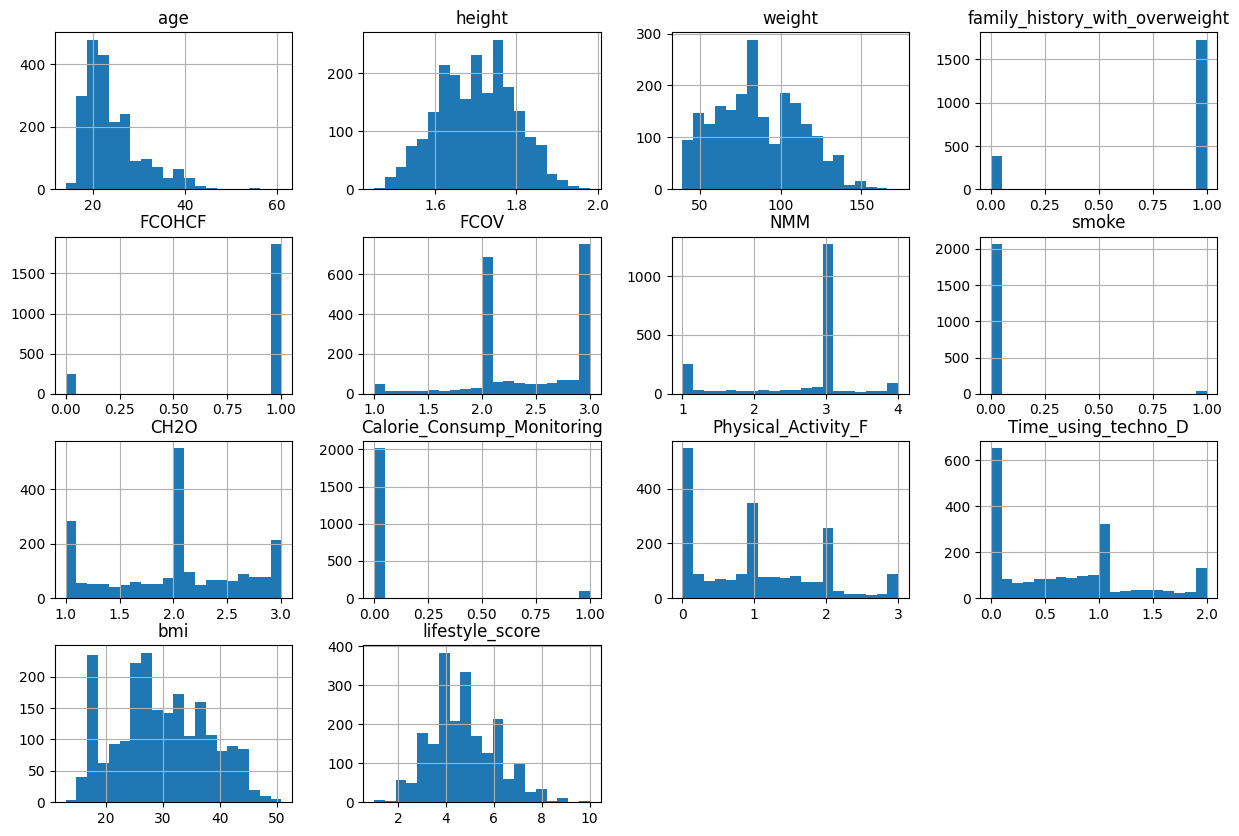

In [44]:
# Plotting histogram
df.hist(figsize=(15,10), bins=20)
plt.show()

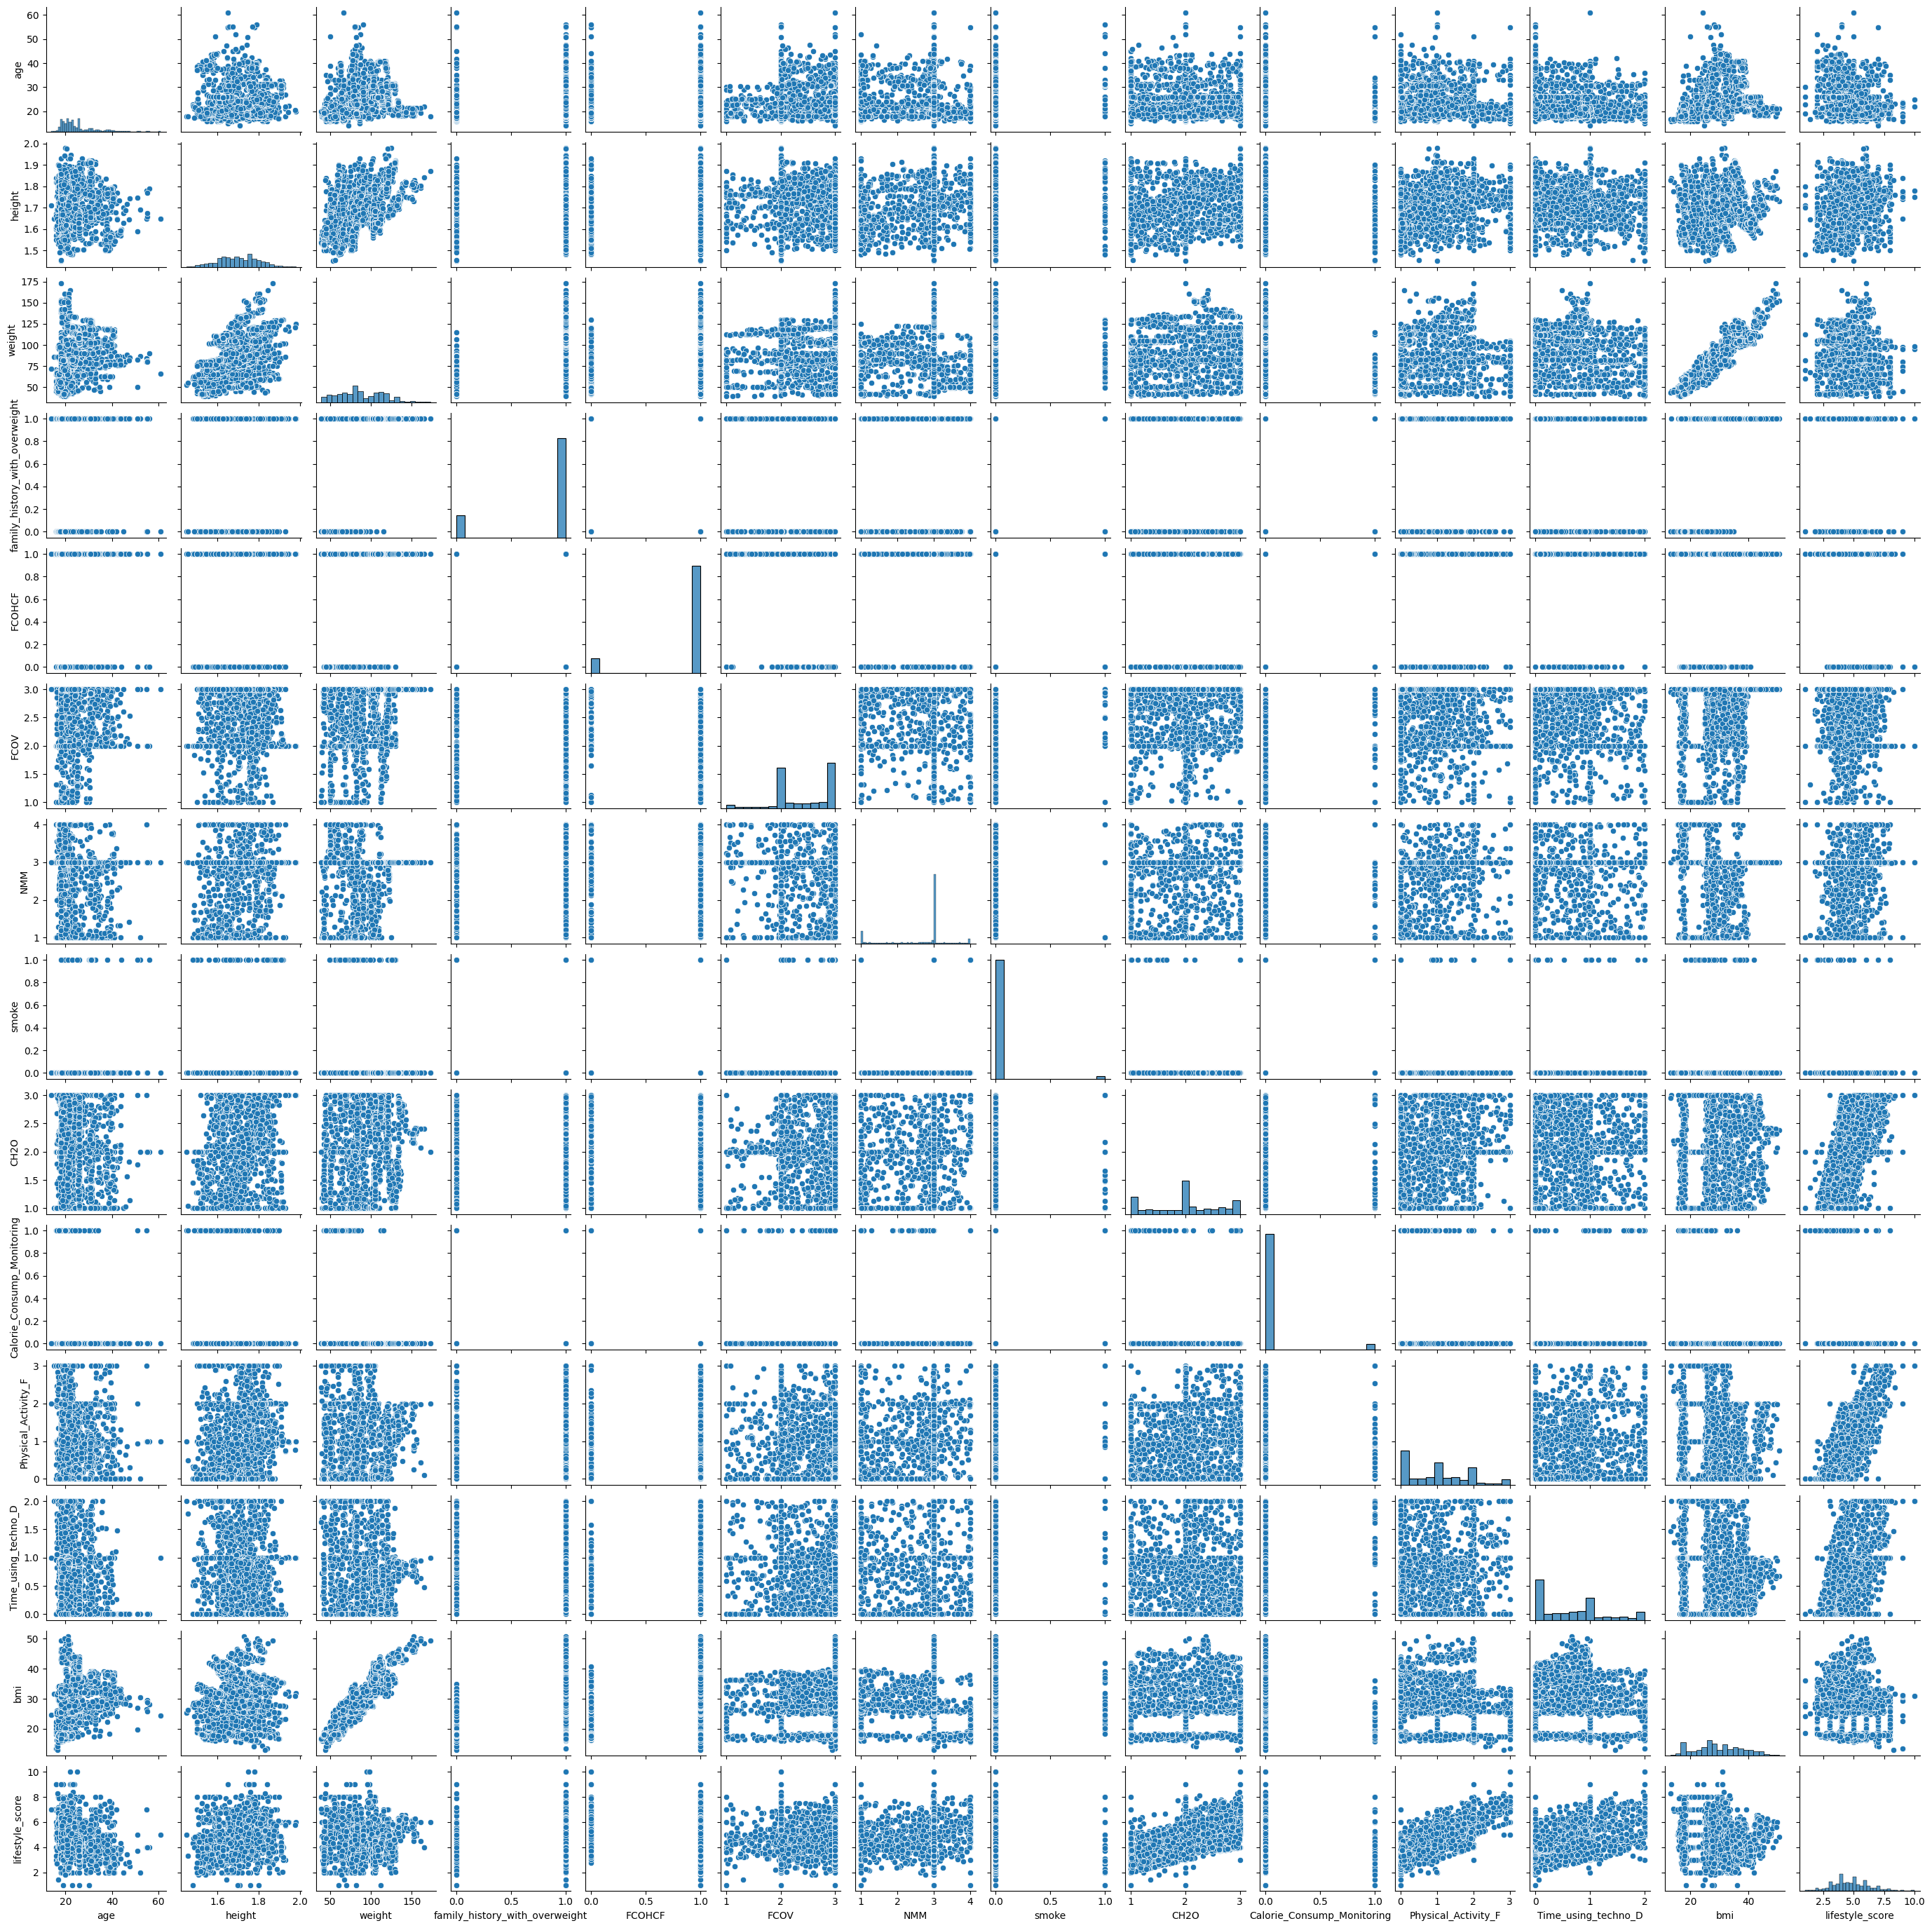

In [45]:
# Pairwise relationships in a dataset
sns.pairplot(df, height=2)
plt.show()

In [46]:
df['gender'].value_counts()

gender
Male      1068
Female    1043
Name: count, dtype: int64

In [47]:
# Compute pairwise correlation only on numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Display the matrix
correlation_matrix


age    height    weight  \
age                             1.000000 -0.025958  0.202560   
height                         -0.025958  1.000000  0.463136   
weight                          0.202560  0.463136  1.000000   
family_history_with_overweight  0.205725  0.247684  0.496820   
FCOHCF                          0.063902  0.178364  0.272300   
FCOV                            0.016291 -0.038121  0.216125   
NMM                            -0.043944  0.243672  0.107469   
smoke                           0.091987  0.055499  0.025746   
CH2O                           -0.045304  0.213376  0.200575   
Calorie_Consump_Monitoring     -0.116283 -0.133753 -0.201906   
Physical_Activity_F            -0.144938  0.294709 -0.051436   
Time_using_techno_D            -0.296931  0.051912 -0.071561   
bmi                             0.244163  0.131785  0.934806   
lifestyle_score                -0.250497  0.275919 -0.009707   

                                family_history_with_overweight    FCOHCF  \
age                                                   0.205725  0.063902   
height                                                0.247684  0.178364   
weight                                                0.496820  0.272300   
family_history_with_overweight                        1.000000  0.208036   
FCOHCF                                                0.208036  1.000000   
FCOV                                                  0.040372 -0.027283   
NMM                                                   0.071370 -0.007000   
smoke                                                 0.017385 -0.050660   
CH2O                                                  0.147437  0.009719   
Calorie_Consump_Monitoring                           -0.185422 -0.190658   
Physical_Activity_F                                  -0.056673 -0.107995   
Time_using_techno_D                                   0.022943  0.068417   
bmi                                                   0.483508  0.246097   
lifestyle_score                                       0.018825 -0.233170   

                                    FCOV       NMM     smoke      CH2O  \
age                             0.016291 -0.043944  0.091987 -0.045304   
height                         -0.038121  0.243672  0.055499  0.213376   
weight                          0.216125  0.107469  0.025746  0.200575   
family_history_with_overweight  0.040372  0.071370  0.017385  0.147437   
FCOHCF                         -0.027283 -0.007000 -0.050660  0.009719   
FCOV                            1.000000  0.042216  0.014320  0.068461   
NMM                             0.042216  1.000000  0.007811  0.057088   
smoke                           0.014320  0.007811  1.000000 -0.031995   
CH2O                            0.068461  0.057088 -0.031995  1.000000   
Calorie_Consump_Monitoring      0.071852 -0.015624  0.047731  0.008036   
Physical_Activity_F             0.019939  0.129504  0.011216  0.167236   
Time_using_techno_D            -0.101135  0.036326  0.017613  0.011965   
bmi                             0.263651  0.039969 -0.000819  0.144200   
lifestyle_score                -0.008030  0.126002 -0.099801  0.559559   

                                Calorie_Consump_Monitoring  \
age                                              -0.116283   
height                                           -0.133753   
weight                                           -0.201906   
family_history_with_overweight                   -0.185422   
FCOHCF                                           -0.190658   
FCOV                                              0.071852   
NMM                                              -0.015624   
smoke                                             0.047731   
CH2O                                              0.008036   
Calorie_Consump_Monitoring                        1.000000   
Physical_Activity_F                               0.074221   
Time_using_techno_D                              -0.010928   
bmi               

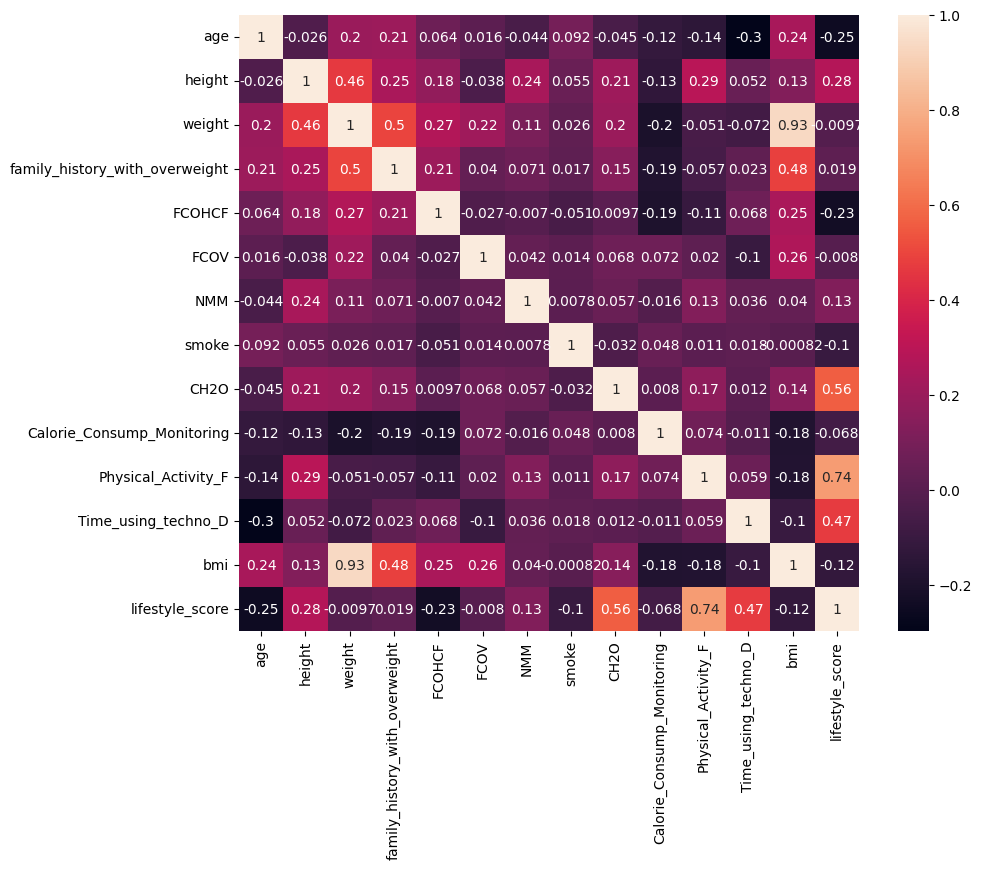

In [48]:
# Heatmap of correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

<Axes: xlabel='gender', ylabel='age'>

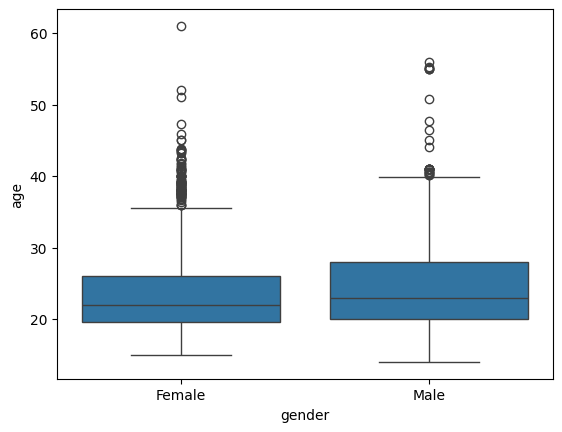

In [49]:
# Box plot with respective catagories
sns.boxplot(x='gender',y='age',data=df)

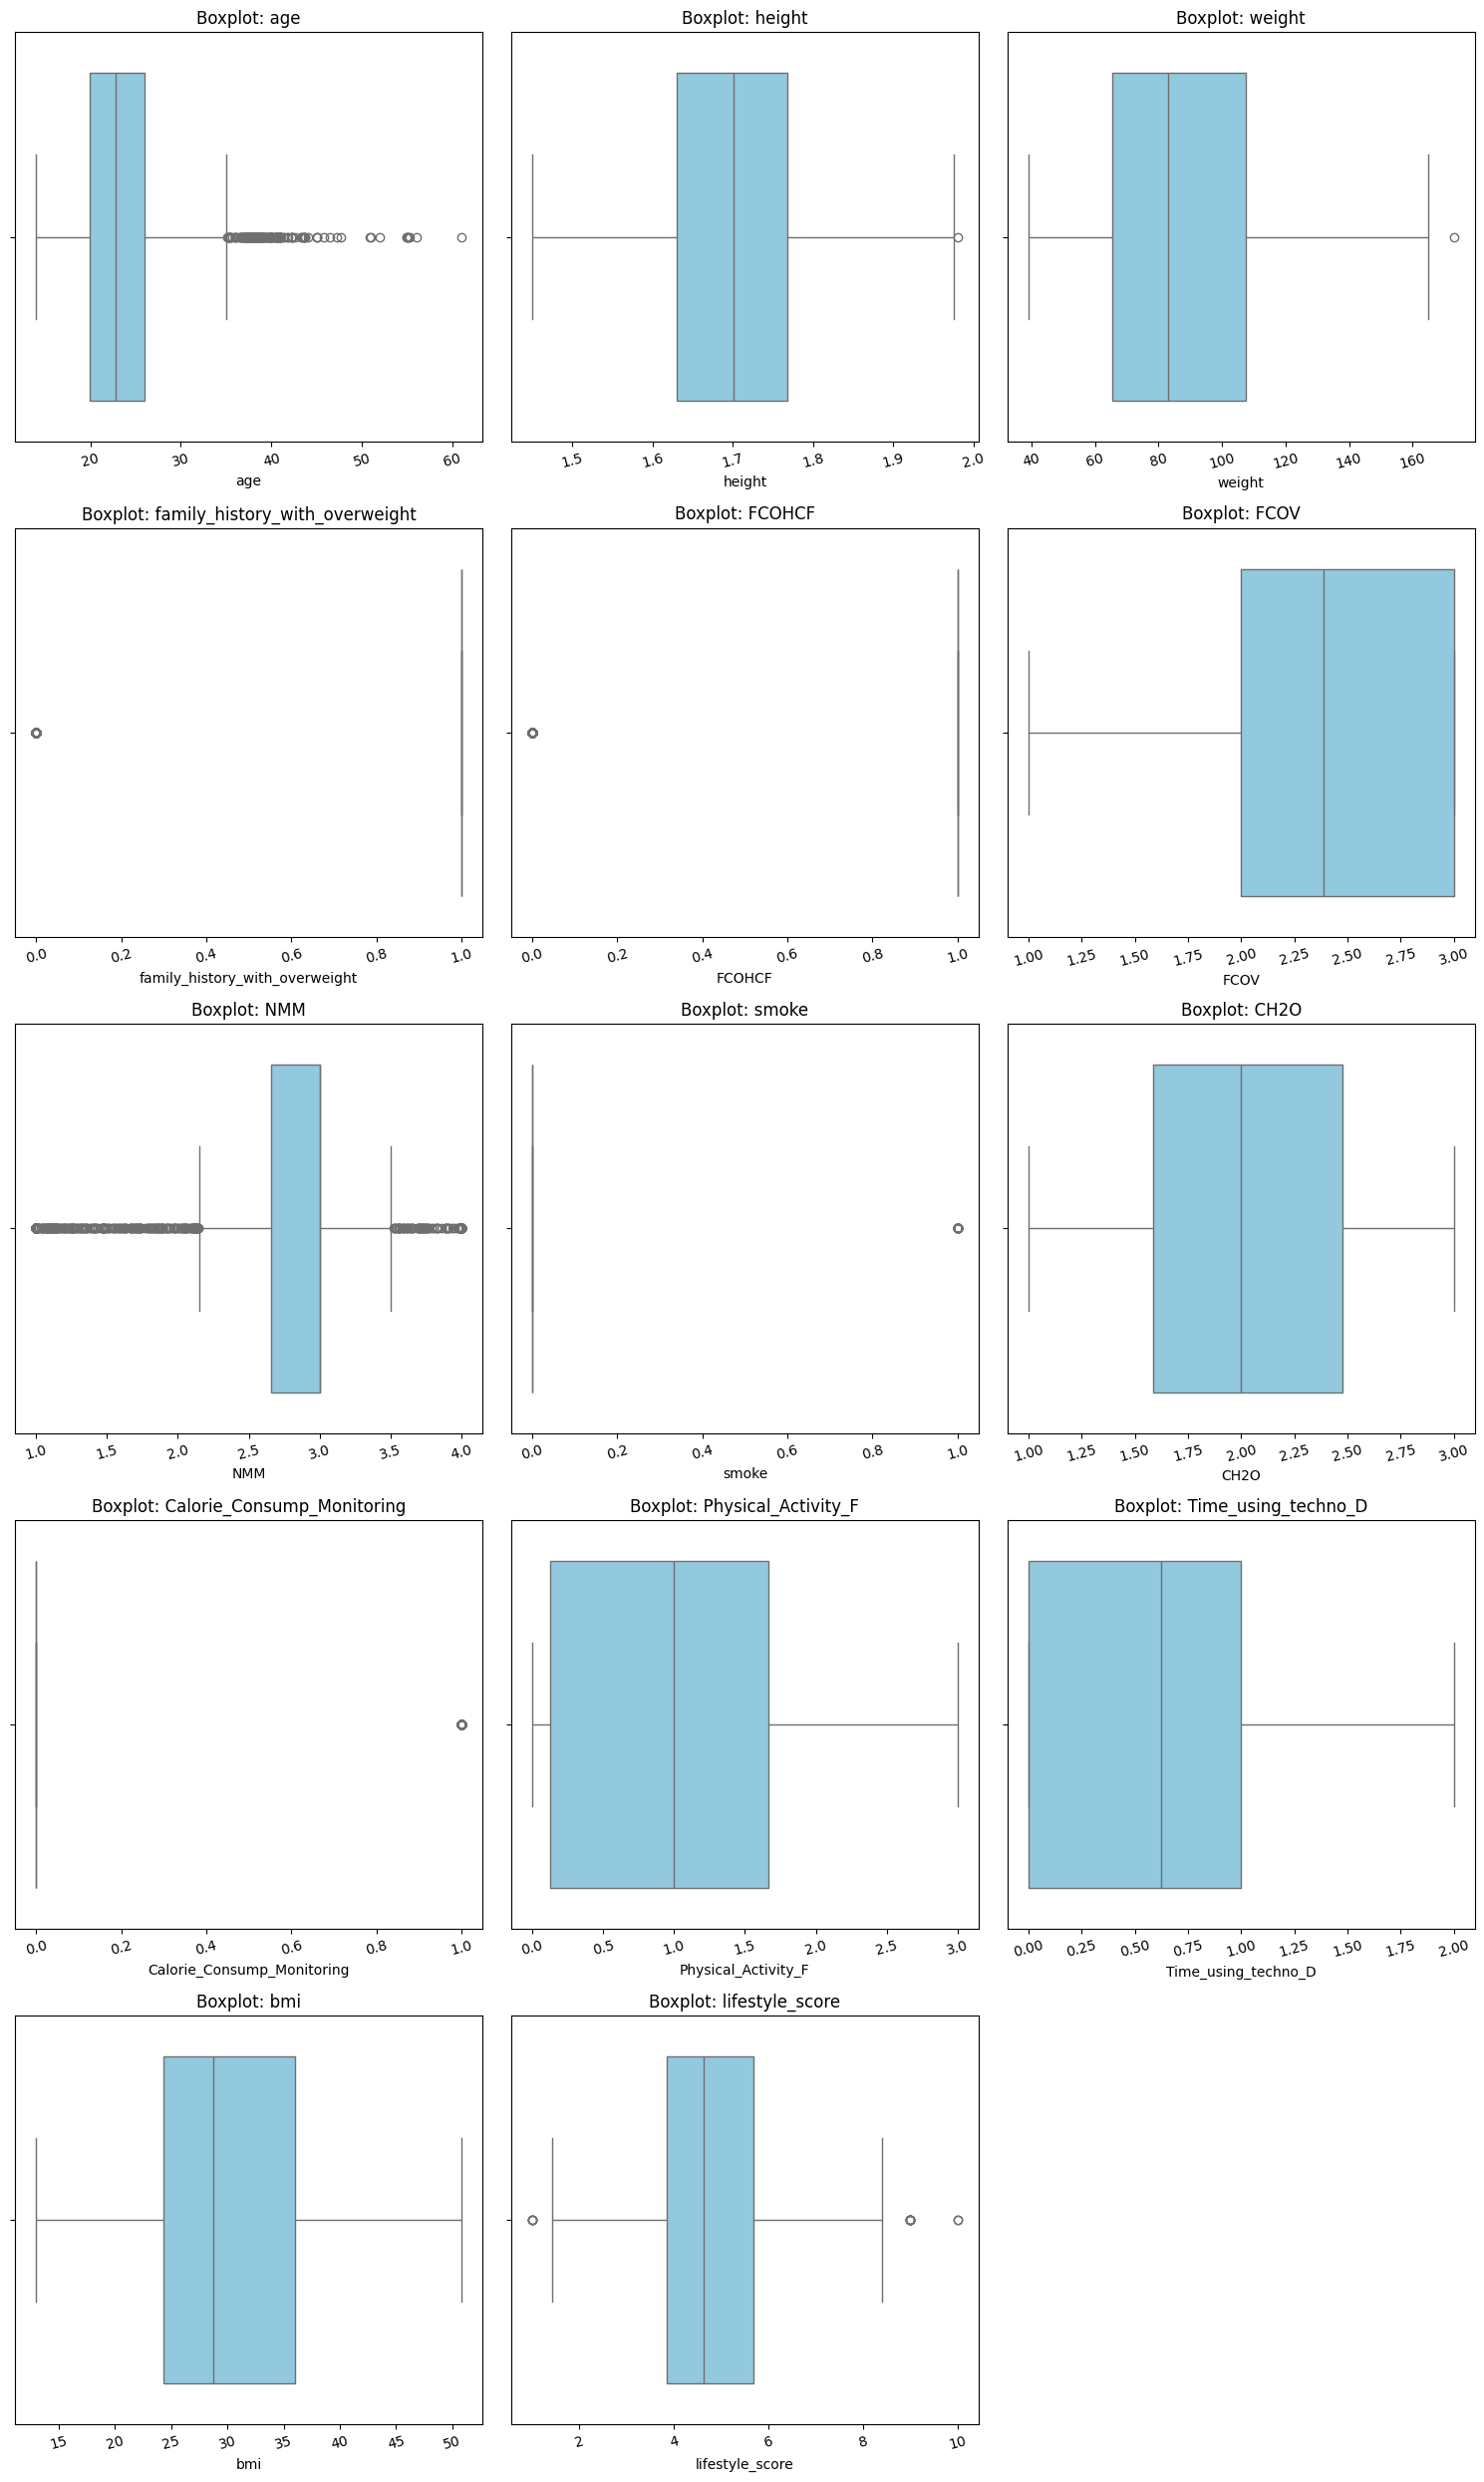

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Setup grid size
cols_per_row = 3
n_rows = math.ceil(len(numeric_cols) / cols_per_row)

# Create boxplots in a grid
fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(5 * cols_per_row, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], color="skyblue")
    axes[i].set_title(f'Boxplot: {col}', fontsize=12)
    axes[i].tick_params(axis='x', labelrotation=15)

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


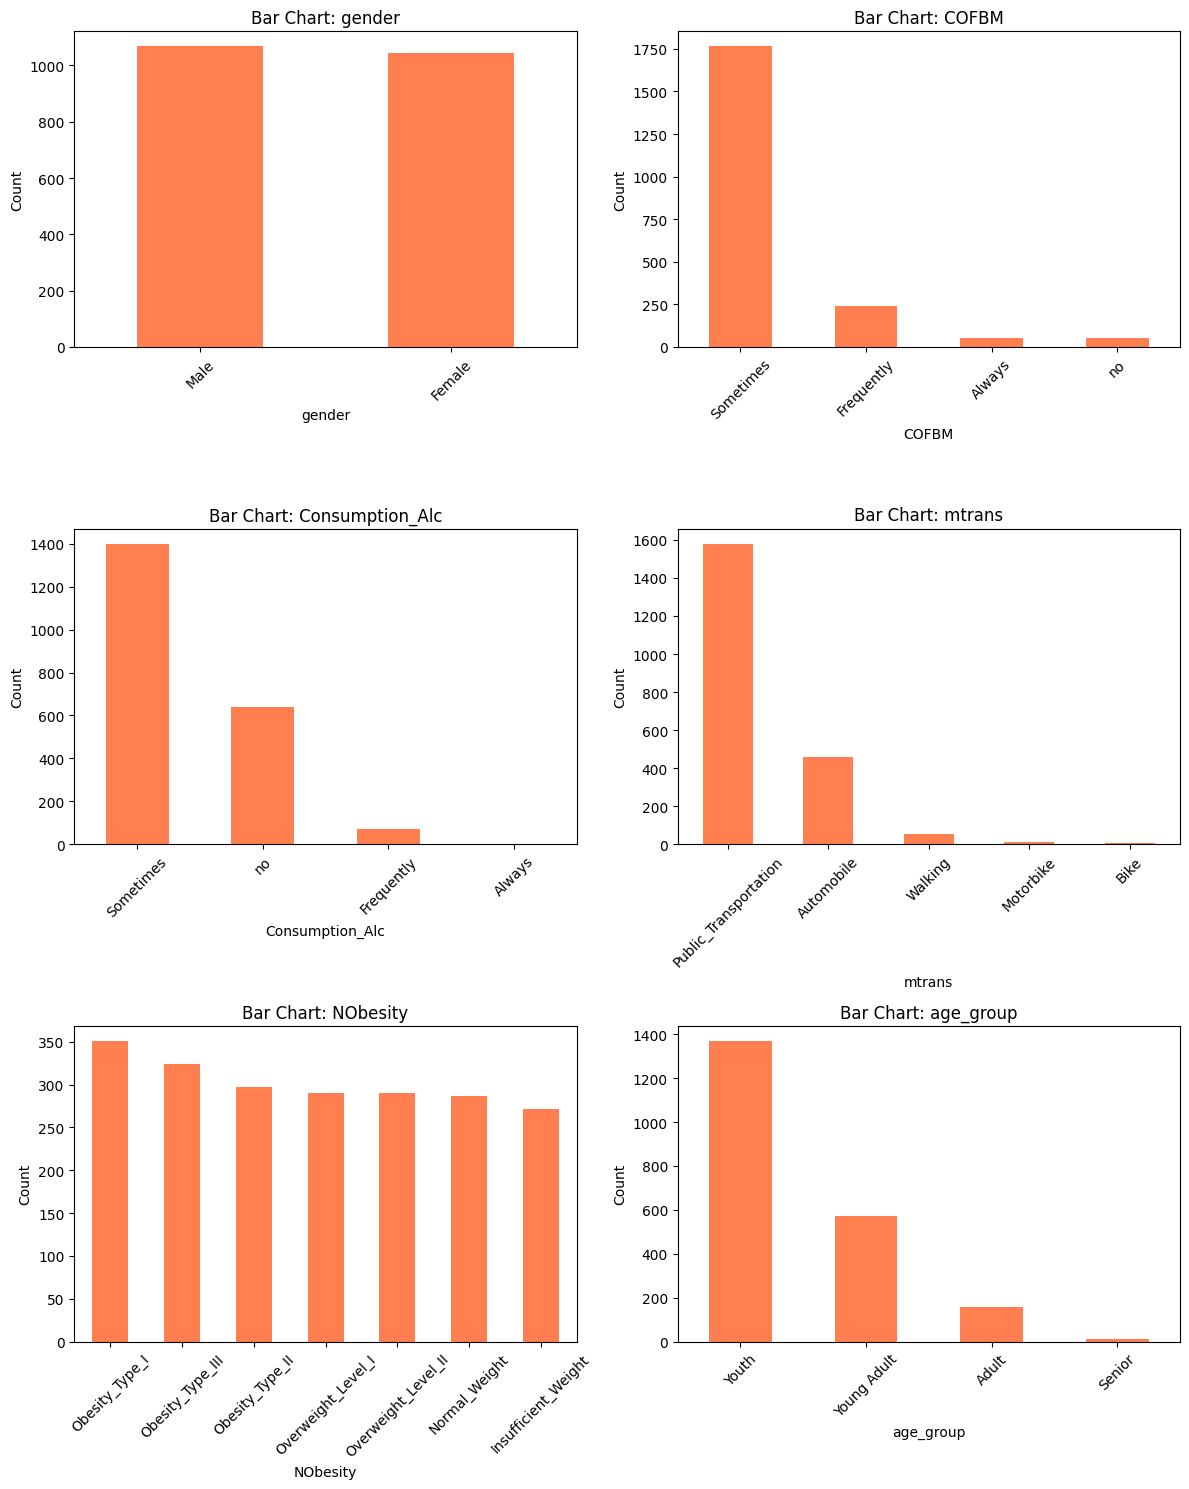

In [51]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Setup grid size
cols_per_row = 2
n_rows = math.ceil(len(categorical_cols) / cols_per_row)

# Create bar plots in a grid
fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(6 * cols_per_row, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color="coral")
    axes[i].set_title(f'Bar Chart: {col}', fontsize=12)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', labelrotation=45)

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Scatterplot of how obesity varies with Physical activity and Age**

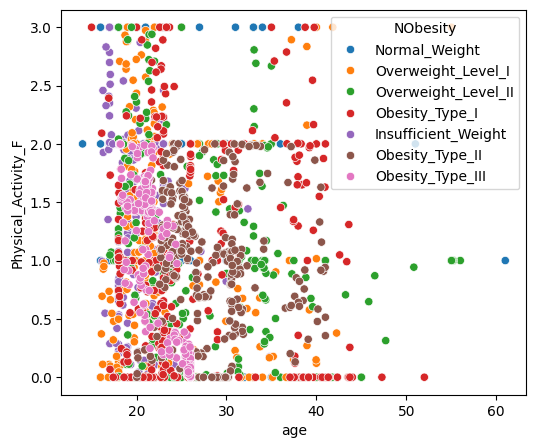

In [53]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='age', y='Physical_Activity_F',data=df, hue = 'NObesity')
plt.show()

- People who are not doing any physical activity are suffering from both overweight and obesity.
- Obesity type III is most frequent in young population between age 15-30.
- We can see that obesity type II is only present in people having age avove 20.

**Variation of obesity according to Weight and Age**

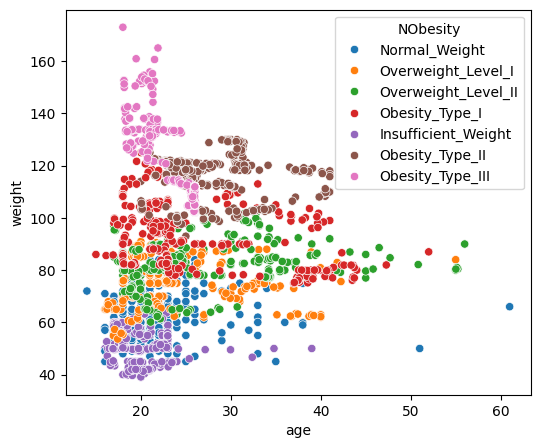

In [55]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='age', y='weight',data=df, hue = 'NObesity')
plt.show()

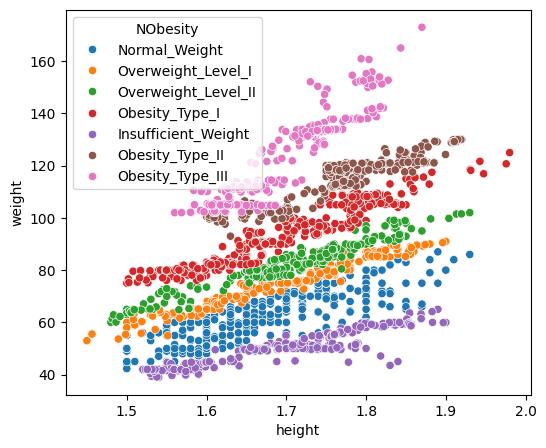

In [57]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='height', y='weight',data=df, hue = 'NObesity')
plt.show()

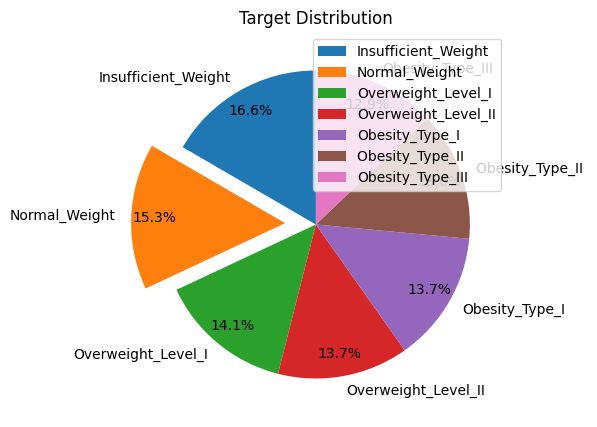

In [58]:
# Pie chart of target variable
plt.figure(figsize=(5, 5))
myexplode = [ 0, 0.2, 0, 0, 0, 0, 0]
plt.pie(df['NObesity'].value_counts(), labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II ', 'Obesity_Type_III'],
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=myexplode)
plt.legend(loc='upper right')
plt.title("Target Distribution")
plt.show()